### Bank Note Authentication

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.
it's a classification problem

In [21]:
##Dataset Link: https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data
import pandas as pd
import numpy as np

In [22]:
df=pd.read_csv('BankNote_Authentication.csv')

In [23]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [24]:
### Independent and Dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [25]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [38]:
y.head(1371)

0       0
1       0
2       0
3       0
4       0
       ..
1366    1
1367    1
1368    1
1369    1
1370    1
Name: class, Length: 1371, dtype: int64

In [27]:
### Train Test Split
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [29]:
### Implement Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
## Prediction
y_pred=classifier.predict(X_test)

In [31]:
### Check Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [32]:
score

0.9902912621359223

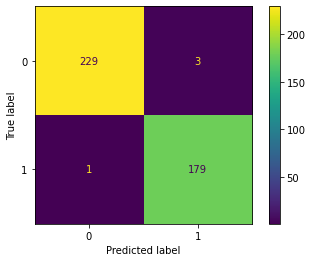

In [33]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test) 


In [34]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

In [35]:
import numpy as np

In [39]:
classifier.predict([[-2.54190,-0.65804,2.6842,1.19520]])

array([1], dtype=int64)